In [11]:
# initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble
# Imports from Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Session

# import basic plot tools
from qiskit.visualization import plot_histogram

In [12]:
# To run on hardware, select the backend with the fewest number of jobs in the queue
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(operational=True, simulator=False)
backend.name

'ibm_brisbane'

In [13]:
n = 3 # number of qubits used to represent s
s = '011'   # the hidden binary string

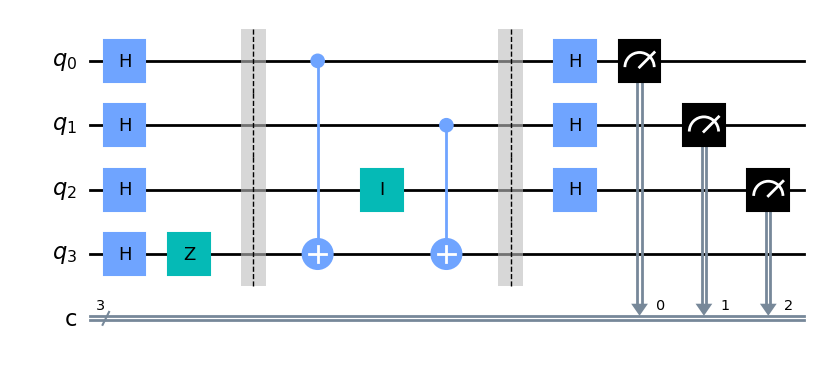

In [14]:
# We need a circuit with n qubits, plus one auxiliary qubit
# Also need n classical bits to write the output to
bv_circuit = QuantumCircuit(n+1, n)

# put auxiliary in state |->
bv_circuit.h(n)
bv_circuit.z(n)

# Apply Hadamard gates before querying the oracle
for i in range(n):
    bv_circuit.h(i)
    
# Apply barrier 
bv_circuit.barrier()

# Apply the inner-product oracle
s = s[::-1] # reverse s to fit qiskit's qubit ordering
for q in range(n):
    if s[q] == '0':
        bv_circuit.i(q)
    else:
        bv_circuit.cx(q, n)
        
# Apply barrier 
bv_circuit.barrier()

#Apply Hadamard gates after querying the oracle
for i in range(n):
    bv_circuit.h(i)

# Measurement
for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw('mpl')

In [15]:
with Session(service, backend='ibmq_qasm_simulator') as session:
    sampler = Sampler(session=session)
    dist = sampler.run(bv_circuit, shots=1024).result().quasi_dists[0]

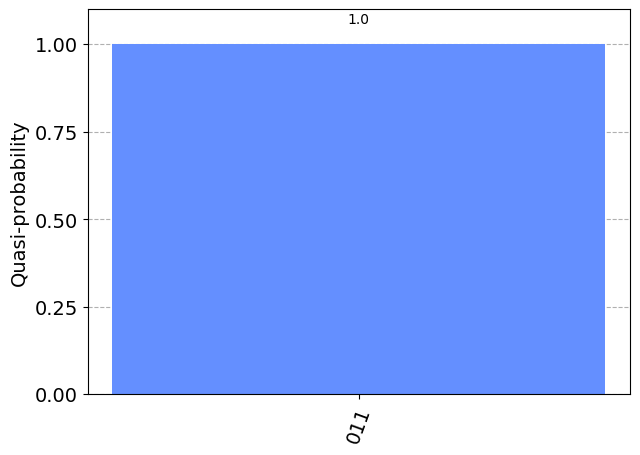

In [16]:
from qiskit.visualization import plot_distribution
plot_distribution(dist.binary_probabilities())

In [18]:
with Session(service, backend=backend) as session:
    sampler = Sampler(session=session)
    dist = sampler.run(bv_circuit, shots=10).result().quasi_dists[0]

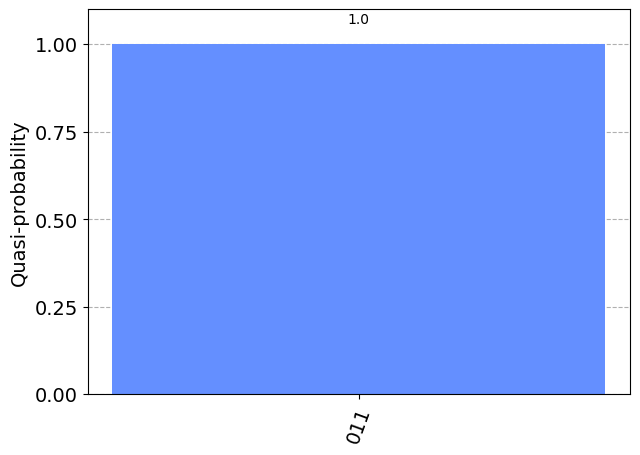

In [19]:
from qiskit.visualization import plot_distribution
plot_distribution(dist.binary_probabilities())